In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import time

In [2]:
def get_day_data(stock):
    #Converts a continuous stock into open, close, high, low data
    stock = stock.reshape(-1,1440)
    open_price = stock[:,570]
    close_price = stock[:,960]
    high_price = np.amax(stock[:,570:960], axis = 1)
    low_price = np.amin(stock[:,570:960], axis = 1)
    return np.vstack((open_price, close_price, high_price, low_price)).T

def get_stock(stock, write = True):
    #Pulls stock from Yahoo Finance
    data = pdr.get_data_yahoo(stock)
    if write:
        np.savetxt(stock + '.dat', data.values)
    return data.values

In [3]:
google = get_stock('GOOG')

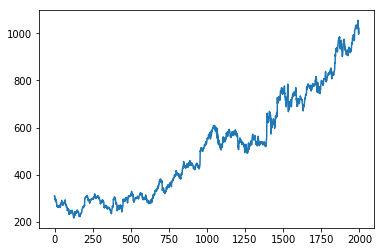

In [4]:
#Plot Google stock price
plt.plot(google[:,0])
plt.show()

In [5]:
#Parameters of simulated stock
num_days = 2000
N = 1440 * num_days
t = np.linspace(0, num_days, N)

In [11]:
#Algorithm for simulating stock
S = np.zeros(N)
S[0] = 1

sigma = 0.02
mu = 0.5*sigma**2 + 0.01
dt = 0.00001

start = time.clock() 
for i in np.arange(1,N):
    S[i] = S[i-1] * (1 + mu * dt + sigma * np.sqrt(dt) * np.random.normal(0, 1))
end = time.clock()

print end - start

10.576463


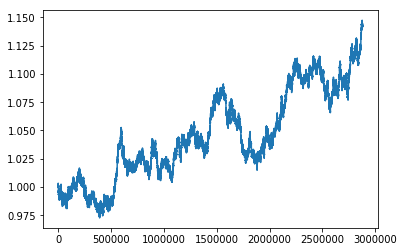

In [12]:
plt.plot(S)
plt.show()

In [13]:
data = get_day_data(S)

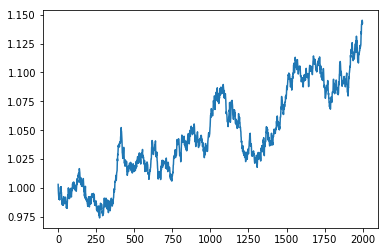

In [14]:
plt.plot(data[:,0])
plt.show()

In [15]:
#np.savetxt('DailyStocks.dat', data)